In [37]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc("font", family="Malgun Gothic")
    
base_dir = 'D:/Data'
excel_file = 'N3335.xlsx'
excel_dir = os.path.join(base_dir, excel_file)

df_from_excel = pd.read_excel(excel_dir, # write your directory here

                              sheet_name = 'Sheet1', 
                              header = 0, 
                              dtype = {'Text': str, 
                                       'Text_Sizo': str, 
                                       'Line_Num': np.int64, 
                                       'Value': np.int64},
                              index_col = 'ID' 
                             )


In [38]:
df_from_excel

,Text_Sizo,Text,Value
ID,,,
10000011,가노라 가노라 임아 언양 단천의 풍월 강산으로 가노라 임아,ㄱㅏㄴㅗㄹㅏ ㄱㅏㄴㅗㄹㅏ ㅇㅣㅁㅇㅏ ㅇㅓㄴㅇㅑㅇ ㄷㅏㄴㅊㅓㄴㅇㅡㅣ ㅍㅜㅇㅇㅜㅓㄹ ㄱ...,1
10000012,가다가 심양강의 비파셩을 어이리,ㄱㅏㄷㅏㄱㅏ ㅅㅣㅁㅇㅑㅇㄱㅏㅇㅇㅡㅣ ㅂㅣㅍㅏㅅㅕㅇㅇㅡㄹ ㅇㅓㅇㅣㅎㆍㄹㅣ,2
10000013,밤즁만 지국춍 닷 감 쇼  못 일워,ㅂㅏㅁㅈㅠㅇㅁㅏㄴ ㅈㅣㄱㅜㄱㅊㅛㅇ ㄷㅏㅅ ㄱㅏㅁㄴㆍㄴ ㅅㅛㄹㆎ ㅈㆍㅁ ㅁㅗㅅ ㅇㅣㄹㅇㅜㅓ,3
10000021,가노라 다시 보쟈 그립거든 어이 살고,ㄱㅏㄴㅗㄹㅏ ㄷㅏㅅㅣ ㅂㅗㅈㅑ ㄱㅡㄹㅣㅂㄱㅓㄷㅡㄴ ㅇㅓㅇㅣ ㅅㅏㄹㄱㅗ,1
10000022,비록 千里라타 의야 아니 보랴,ㅂㅣㄹㅗㄱ ㅊㅓㄴㄹㅣㄹㅏㅌㅏ ㅺㅜㅁㅇㅡㅣㅇㅑ ㅇㅏㄴㅣ ㅂㅗㄹㅑ,2
...,...,...,...
10033342,긴 들 黃雲이 빗치 피거고야,ㄱㅣㄴ ㄷㅡㄹ ㅎㅗㅏㅇㅇㅜㄴㅇㅣ ㅎㆍㄴㅂㅣㅅㅊㅣ ㅍㅣㄱㅓㄱㅗㅇㅑ,2
10033343,아야 비 술 걸러라 秋興 계워 노라,ㅇㅏㅎㆎㅇㅑ ㅂㅣㅈㆍㄴ ㅅㅜㄹ ㄱㅓㄹㄹㅓㄹㅏ ㅊㅜㅎㅡㅇ ㄱㅖㅇㅜㅓ ㅎㆍㄴㅗㄹㅏ,3
10033351,힘  홈 나라 爲 홈인가,ㅎㅣㅁᄡㅓ ㅎㆍㄴㆍㄴ ᄡㅏㅎㅗㅁ ㄴㅏㄹㅏ ㅇㅜㅣㅎㆍㄴ ᄡㅏㅎㅗㅁㅇㅣㄴㄱㅏ,1


In [39]:
# Train용 데이타

In [40]:
List_from_df_Train_Text_withB = df_from_excel.iloc[:9000,1].values.tolist() 
#print(List_from_df_Train_Text_withB)
List_from_df_Train_Value = df_from_excel.iloc[:9000,2].values.tolist() 
#print(List_from_df_Train_Value)

In [41]:
# test용 데이타

In [42]:
List_from_df_Test_Text_withB = df_from_excel.iloc[9000:,1].values.tolist()  #  Test 텍스트
print(List_from_df_Test_Text_withB)
List_from_df_Test_Value = df_from_excel.iloc[9000:,2].values.tolist() #  Test Value
print(List_from_df_Test_Value)

['ㅊㅜㄴㅍㅜㅇㅇㅣ ㄱㅓㄴㄷㆍㅅ ㅂㅜㄹㅓ ㄷㅗㅇㅣㅁ ㄱㅡㅣㅂㅕㄹ ㅈㅑㅁㄱㅏㄴ ㄷㅡㅅㄱㅗ', 'ㅁㅏㄴㅈㅜㅇㅇㅜㄴㅅㅏㄴㅇㅡㄹ ㅎㅓㅇㅜㅣㅎㅓㅇㅜㅣ ㄴㅓㅁㅓ ㅇㅗㄴㅣ', 'ㅇㅓㅈㅓㅂㅓ ㅊㅣㄹㄴㅕㄴㅇㅡㅣ ㅅㅣㅇㅜㅂㅗㄴㄷㆍㅅ ㅎㆍㅇㅖㄷㅏ', 'ㅊㅜㄴㅍㅜㅇㅈㅏㅇㅊㅐㄱㅅㅏㅇㅊㅓㄴㄷㅜㅎㆍㅇㅑ ㅎㅏㄴㅇㅑㅇㅅㅓㅇㄹㅣㄹㅡㄹ ㄹㅕㄱㄹㅕㄱㅎㅣ ㄷㅡㄹㄴㅓㅂㅗㄴㅣ', 'ㅇㅣㄴㅇㅗㅏㅇㅅㅏㄴ ㅅㅏㅁㄱㅏㄱㅂㅗㅇㅇㅡㄴ ㅎㅗㄱㅜㅔㄹㅛㅇㅂㅏㄴㅅㅔㄹㅗ ㅂㅐㄱㅡㄱㅇㅡㄹ ㄱㅗㅣㅇㅑ ㅇㅣㅅㄱㅗ ㅈㅗㅇㄴㅏㅁㅎㅏㄴㅅㅜㄴㆍㄴ ㄱㅡㅁㄷㅐㅅㅏㅇㄹㅕㄴㅎㆍㅇㅑㄱㅜㅇㅜㅓㄴㅎㆍㄹ ㄱㅣㅅㅏㅇㅇㅣ ㅁㅏㄴㅊㅓㄴㅅㅔㅈㅣㅁㅜㄱㅏㅇㅇㅣㄹㅗㄷㅏ', 'ㄱㅜㄴㅅㅜㄷㅓㄱㅅㅣㄴㅅㅜㅈㅓㅇㅎㆍㄴㅣ ㄹㅖㅇㅡㅣㄷㅗㅇㅂㅏㅇㅇㅣㄹㅏ ㅇㅛㅈㅣㅇㅣㄹㅇㅜㅓㄹㅇㅣㅇㅗ ㅅㅜㄴㅈㅣㄱㅓㄴㄱㅗㄴㅇㅣㄹㅗㄷㅏ', 'ㅊㅜㄴㅍㅜㅇㅎㅗㅏㄹㅠ ㅂㅓㄴㅎㅗㅏㅅㅣㅇㅡㅣ ㅅㅗㅅㅈㅓㄱㄷㅏ ㅇㅜㄴㅡㄴ ㅅㅗㅅㅈㅓㄱㅼㅏㅅㆎㅇㅑ', 'ㅁㅜㄴㅎㅏㅅㅣㄱㄱㅐㄱ ㅅㅏㅁㅊㅓㄴㅇㅣㄴㅇㅡㄹ ㄷㅏ ㅁㅗㅅㅁㅓㄱㅇㅣㅇㅕ ㅇㅜㄴㅏㄴㅇㅑ', 'ㅈㅣㄱㅡㅁㅇㅡㅣ ㅅㅣㄴㄴㅡㅇㅁㅐㅇㅅㅏㅇㅍㅕㅇㅇㅜㅓㄴ ㅊㅜㅇㅅㅣㄴㅎㅗㄱㅓㄹ ㅍㅜㅇㄹㅠㄹㅡㄹ ㄴㅔ ㅇㅏㄴㅡㄴㅇㅑ', 'ㅊㅜㄴㅍㅜㅇ ㅎㅗㅏㅎㅜㅎㅗㅅㅣㅇㅔ ㅂㅓㅁㄴㅏㅂㅜㅣ ㅁㅗㅁㅇㅣ ㄷㅗㅣㅇㅕ', 'ㅂㅐㄱㅎㅗㅏㅊㅗㅇㄹㅣㅇㅔ ㅎㅑㅇㄱㅣ ㅈㅕㅅㅈㅕ ㄴㅗㄴㅣㄹㄱㅓㄴㅣ', 'ㅅㅔㅅㅏㅇㅇㅔ ㅇㅣㄹㅓㅎㆍㄴ ㅎㅗㅎㅡㅇㅇㅡㄹ ㅁㅜㅇㅓㅅㅡㄹㅗ ㅂㅣㅎㅓㄹㅅㅗㄴㅑ', 'ㅊㅜㄴㅎㅏㅊㅜㄷㅗㅇㅈㅣㅅㅜㄷㅏㅇㅇㅡㄴ ㅂㅕㄱㅇㅣㅎㅗㅏㅈㅏㅇㅏㄱㅎㅗㅏㅇㅛ', 'ㄱㅜㄴㅈㅏㅇㅕㄴ ㄷㅐㅂㅜㅅㅗㅇㅇㅡㄹ', 'ㅈㅣㄱㅡㅁㅇㅔ ㄴㅏㅁㅎㅏㄴㅍㅜㅇㄹㅠㄴㅡㄴ ㄱㅡㅁㅅㅏㅇㄱㅜㄱ ㅁㅣㄴㅅㅏㅇㄱㅜㄱㅇㅣㄹㅏ ㅎㆍㄹㄴㅏㅅㄷㅏ', 'ㅊㅜㄴㅎㅑㅇㅇㅣ ㄴㅔㄹㅗㅅㄷㅓㄴㅑ ㅇㅣㄷㅗㄹㅕㅇ ㄱㅡㅣ ㄴㅜㅣㄹㅓㄴㅣ', 'ㅇㅑㅇㅇㅣㄴ ㅇㅣㄹㅅㅣㅁㅇㅣ ㅁㅏㄴㄱㅓㅂㅇㅣㄴㄷㅡㄹ ㅂㅜㄹㅇㅡㄹㅅㅗㄴㅑ', 'ㅇㅏㅁㅏㄷㅗ ㅇㅣ ㅁㆍㅇㆍㅁ ㅂㅣㅊㅗㅣㄱㅣㄴㆍㄴ ㅁㅕㅇㅊㅓㄴㅇㅣㅅㅣㄴㄱㅏ ㅎㆍㄴㅗㄹㅏ', 'ㅊㅜㄹㅈㅏㄷㅗㅇㅁㅜㄴㅎㅏㄴㅣ ㄴㅗㄱㅇㅑㅇㅇㅣ ㅊㅓㄴㅅㅏㅣㄹㅏ', 'ㅅㅏㅅㅏ

In [43]:
train_input = List_from_df_Train_Text_withB  #음소(Blank처리) 단위 텍스트 입력
train_label = List_from_df_Train_Value
test_input = List_from_df_Test_Text_withB    #음소(Blank처리) 단위 텍스트 입력
test_label = List_from_df_Test_Value

# Function : to_word_chunk7 어절첫모음/어절말음소/첫음소


In [44]:
# 함수 : New Syllable centered word chunks(1개의 문장으로 만듦) - Train 용
# rule 1 : vowel + Blank("B로 표시") - 하나의 문장으로 만들기 위해 빈칸 더해 줌
# rule 2 : 2-5개 음절 chunk

def to_word_chunk7(text_list): 
    test_list_new = []
    for each_item in text_list:
        if type(each_item)!=str:
            e="NNN"
            test_list_new.append(e)
        else:
            
            each_list = each_item.split() 
            d=[]
            e =""    
            for each_word in each_list:
                if len(each_word)/3 < 1.7:
                    e+=each_word[:1]+" "
                    e+=each_word[:-2]+" "
                    e+=each_word[-2:]+"B "           
                    e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
            
                elif len(each_word)/3 >= 1.7 and  len(each_word)/3 < 3:
                    e+=each_word[:1]+" "
                    e+=each_word[:2]+" "
                    e+=each_word[1:3]+" "  #어절 첫 모음
                    e+=each_word[-2:]+"B "   
                    e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
                elif len(each_word)/3 >=3 and len(each_word)/3 <5:
                    e+=each_word[:1]+" "
                    e+=each_word[:2]+" "
                    e+=each_word[1:3]+" "  #어절 첫 모음
                    e+=each_word[2:-4]+" "       
                    e+=each_word[-4:-2]+" "
                    e+=each_word[-2:]+"B "   
                    e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
                elif len(each_word)/3 >=5 and len(each_word)/3 <8:
                    e+=each_word[:1]+" "
                    e+=each_word[:2]+" "
                    e+=each_word[1:3]+" "  #어절 첫 모음
                    e+=each_word[2:4]+" " 
                    e+=each_word[4:6]+" " 
                    e+=each_word[6:-2]+" "
                    e+=each_word[-2:]+"B "   
                    e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
                elif len(each_word)/3 >=8 and len(each_word)/3 <11:
                    e+=each_word[:1]+" "
                    e+=each_word[:2]+" "
                    e+=each_word[1:3]+" "  #어절 첫 모음
                    e+=each_word[2:5]+" " 
                    e+=each_word[5:8]+" " 
                    e+=each_word[8:12]+" "
                    e+=each_word[12:15]+" " 
                    e+=each_word[15:19]+" "
                    e+=each_word[19:-2]+" "
                    e+=each_word[-2:]+"B "   
                    e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
                else: 
                
                    e+=each_word[:1]+" "
                    e+=each_word[:2]+" "
                    e+=each_word[1:3]+" "  #어절 첫 모음
                    e+=each_word[2:5]+" " 
                    e+=each_word[5:8]+" " 
                    e+=each_word[8:12]+" "
                    e+=each_word[12:15]+" " 
                    e+=each_word[15:19]+" "
                    e+=each_word[19:22]+" "
                    e+=each_word[22:26]+" "
                    e+=each_word[26:-2]+" "
                    e+=each_word[-2:]+"B "
                    e+=each_word[-1:]+"B "   # 중첩시킨 어절말음소
            test_list_new.append(e)
            
        
    return test_list_new

In [45]:
train_ = to_word_chunk7(train_input)
test_ = to_word_chunk7(test_input)

print(len(train_))   
print("--------------------------------------------------------------------------------------------------------")   


9000
--------------------------------------------------------------------------------------------------------


In [46]:
list1 = train_  +  test_ 
array1 = np.array(list1)
Sizo_data_df = pd.DataFrame(array1, columns =["cleaned_text"])
Sizo_data_df


,cleaned_text
0,ㄱ ㄱㅏ ㅏㄴ ㄹㅏB ㅏB ㄱ ㄱㅏ ㅏㄴ ㄹㅏB ㅏB ㅇ ㅇㅣㅁ ㅇㅏB ㅏB ㅇ ㅇ...
1,ㄱ ㄱㅏ ㅏㄷ ㄱㅏB ㅏB ㅅ ㅅㅣ ㅣㅁ ㅁㅇㅑㅇㄱㅏ ㅇㅇ ㅡㅣB ㅣB ㅂ ㅂㅣ ㅣ...
2,ㅂ ㅂㅏ ㅏㅁ ㅁㅈㅠ ㅇㅁ ㅏㄴB ㄴB ㅈ ㅈㅣ ㅣㄱ ㅛㅇB ㅇB ㄷ ㄷ ㅏㅅB ㅅ...
3,ㄱ ㄱㅏ ㅏㄴ ㄹㅏB ㅏB ㄷ ㄷㅏ ㅅㅣB ㅣB ㅂ ㅂㅗ ㅈㅑB ㅑB ㄱ ㄱㅡ ㅡㄹ...
4,ㅂ ㅂㅣㄹ ㅗㄱB ㄱB ㅊ ㅊㅓ ㅓㄴ ㄴㄹㅣ ㄹㅏ ㅌㅏB ㅏB ㅺ ㅺㅜ ㅜㅁ ㅇㅑB...
...,...
10000,ㄱ ㄱ ㅣㄴB ㄴB ㄷ ㄷ ㅡㄹB ㄹB ㅎ ㅎㅗ ㅗㅏ ㅏㅇㅇ ㅜㄴ ㅇㅣB ㅣB ㅎ ...
10001,ㅇ ㅇㅏ ㅏㅎ ㅇㅑB ㅑB ㅂ ㅂㅣㅈ ㆍㄴB ㄴB ㅅ ㅅ ㅜㄹB ㄹB ㄱ ㄱㅓ ㅓㄹ...
10002,ㅎ ㅎㅣㅁ ᄡㅓB ㅓB ㅎ ㅎㆍㄴ ㆍㄴB ㄴB ᄡ ᄡㅏㅎ ㅗㅁB ㅁB ㄴ ㄴㅏ ㄹㅏ...
10003,ㅇ ㅇㅗ ㅗㅅ ㅅㅂㅏ ㅂㅇ ㅡㅣB ㅣB ㅁ ㅁㅜ ㅜㅅ ㅅㅌㅕ ㅇㅣ ㅅㅕB ㅕB ㅎ ...


In [47]:
new_columns = ["Value"]
df_Value =df_from_excel[new_columns]
list2 = df_Value.values.tolist()
list_=[]
for i in list2:
    list_ += i
 
print(list_)

Sizo_data_df["category"] = list_
Sizo_data_df

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 

,cleaned_text,category
0,ㄱ ㄱㅏ ㅏㄴ ㄹㅏB ㅏB ㄱ ㄱㅏ ㅏㄴ ㄹㅏB ㅏB ㅇ ㅇㅣㅁ ㅇㅏB ㅏB ㅇ ㅇ...,1
1,ㄱ ㄱㅏ ㅏㄷ ㄱㅏB ㅏB ㅅ ㅅㅣ ㅣㅁ ㅁㅇㅑㅇㄱㅏ ㅇㅇ ㅡㅣB ㅣB ㅂ ㅂㅣ ㅣ...,2
2,ㅂ ㅂㅏ ㅏㅁ ㅁㅈㅠ ㅇㅁ ㅏㄴB ㄴB ㅈ ㅈㅣ ㅣㄱ ㅛㅇB ㅇB ㄷ ㄷ ㅏㅅB ㅅ...,3
3,ㄱ ㄱㅏ ㅏㄴ ㄹㅏB ㅏB ㄷ ㄷㅏ ㅅㅣB ㅣB ㅂ ㅂㅗ ㅈㅑB ㅑB ㄱ ㄱㅡ ㅡㄹ...,1
4,ㅂ ㅂㅣㄹ ㅗㄱB ㄱB ㅊ ㅊㅓ ㅓㄴ ㄴㄹㅣ ㄹㅏ ㅌㅏB ㅏB ㅺ ㅺㅜ ㅜㅁ ㅇㅑB...,2
...,...,...
10000,ㄱ ㄱ ㅣㄴB ㄴB ㄷ ㄷ ㅡㄹB ㄹB ㅎ ㅎㅗ ㅗㅏ ㅏㅇㅇ ㅜㄴ ㅇㅣB ㅣB ㅎ ...,2
10001,ㅇ ㅇㅏ ㅏㅎ ㅇㅑB ㅑB ㅂ ㅂㅣㅈ ㆍㄴB ㄴB ㅅ ㅅ ㅜㄹB ㄹB ㄱ ㄱㅓ ㅓㄹ...,3
10002,ㅎ ㅎㅣㅁ ᄡㅓB ㅓB ㅎ ㅎㆍㄴ ㆍㄴB ㄴB ᄡ ᄡㅏㅎ ㅗㅁB ㅁB ㄴ ㄴㅏ ㄹㅏ...,1
10003,ㅇ ㅇㅗ ㅗㅅ ㅅㅂㅏ ㅂㅇ ㅡㅣB ㅣB ㅁ ㅁㅜ ㅜㅅ ㅅㅌㅕ ㅇㅣ ㅅㅕB ㅕB ㅎ ...,2


# Dimensionality Reduction (PCA)

Reduce dimensionality of tf-idf matrix representation of sklearn's "The 3335 Sizo groups text dataset" to two. Create a scatter plot of these documents. Each category should be coloured differently.

In [48]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')

In [49]:
tfidf_model = TfidfVectorizer(max_features=200)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(Sizo_data_df['cleaned_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,ㄱb,ㄱㅇ,ㄱㅏ,ㄱㅏb,ㄱㅓ,ㄱㅕ,ㄱㅗ,ㄱㅗb,ㄱㅜ,ㄱㅡ,...,ㆍb,ㆍㄴ,ㆍㄴb,ㆍㄹ,ㆍㄹb,ㆍㅁ,ㆍㅁb,ㆍㅇ,ㆎb,ㆎㅇ
0,0.000000,0.0,0.520846,0.000000,0.0,0.0,0.0,0.00000,0.0,0.00000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.000000,0.0,0.229896,0.230858,0.0,0.0,0.0,0.00000,0.0,0.00000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.000000,0.0,0.189454,0.000000,0.0,0.0,0.0,0.00000,0.0,0.00000,...,0.0,0.0,0.182652,0.0,0.0,0.0,0.294505,0.0,0.191814,0.0
3,0.000000,0.0,0.244322,0.000000,0.0,0.0,0.0,0.19068,0.0,0.29653,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.262251,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.0,0.00000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(2) 

In [52]:
pca.fit(tfidf_df)

PCA(n_components=2)

In [53]:
reduced_tfidf = pca.transform(tfidf_df)
reduced_tfidf

array([[ 0.10551728,  0.13188003],
       [-0.16251583,  0.07722216],
       [ 0.13201099, -0.11380687],
       ...,
       [ 0.30749447,  0.06268056],
       [-0.05024734,  0.04905371],
       [-0.2467287 ,  0.26182107]])

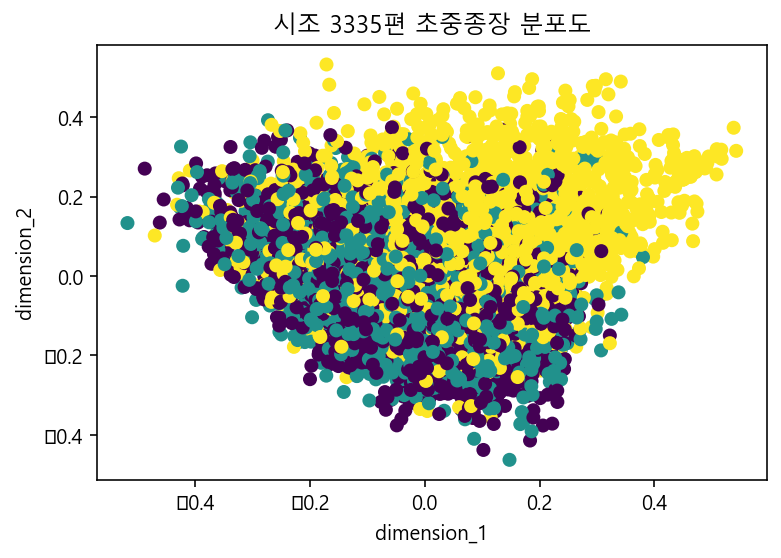

In [54]:
plt.scatter(reduced_tfidf[:, 0], reduced_tfidf[:, 1], c=Sizo_data_df['category'], cmap='viridis')
plt.xlabel('dimension_1')
plt.ylabel('dimension_2')
plt.title('시조 3335편 초중종장 분포도')
plt.show()